# ДЗ 3: Интегрирование методом Монте-Карло

Нужно посчитать интеграл, ограниченный следующей поверхностью, для положительных x, y, z:
$$ \frac{x^{2/3}}{a} + \frac{y^{2/3}}{b} + \frac{z^{2/3}}{c} < 1 $$

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import matplotlib.pyplot as plt
%matplotlib inline

Среднее значение интеграла: 11.382015901639344


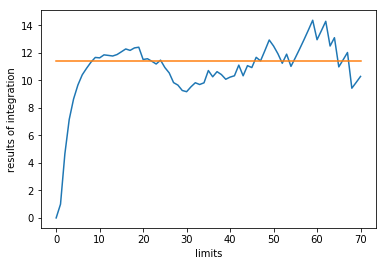

In [62]:
def unif_integration(lim, a, b ,c, n, seed):
    rndm = np.random.RandomState(seed)
    x, y, z = rndm.uniform(0, lim, size = (3, n))
    k = np.count_nonzero(((x**(2/3))/a + (y**(2/3))/b + (z**(2/3))/c) < 1)/n
    volume = lim**3
    return k * volume
#lim - это сторона куба, в котором распределены точки

a, b, c = 2, 3, 7
n = 100000
lim = np.linspace(0, 70, 71)
seed = 25
results_MC = np.array([unif_integration(lim, a, b, c, n, seed) for lim in lim])
plt.plot(lim, results_MC)
plt.xlabel('limits')
plt.ylabel('results of integration')
plt.plot(np.mean(results_MC[10:71])*np.ones(len(lim)))
print('Среднее значение интеграла:', np.mean(results_MC[10:71]))

Видно, что интеграл "набирается" при значении стороны куба меньше 10, поэтому для стороны больше 10 имеет смысл взять среднее значение.

Значение интеграла почти совпадает с тем, что выдает Wolfram Mathematica: **11.5768**

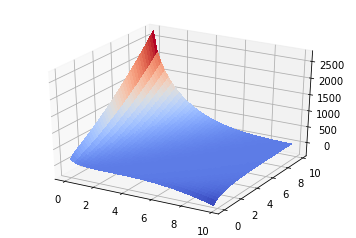

In [63]:
#Построим нашу поверхность
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, 10, 0.25)
Y = np.arange(0, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (c*(1 - X**(2/3)/a + Y**(2/3)/b))**3/2

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

In [64]:
import sobol_seq

Среднее значение интеграла: 11.786575000000001


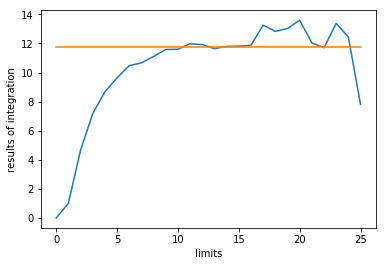

In [65]:
def sobol_integration(lim, a, b ,c, n):
    Sobol = lim*(sobol_seq.i4_sobol_generate(3, n))
    xs, ys, zs = Sobol[:, 0], Sobol[:, 1], Sobol[:, 2]
    k = np.count_nonzero(((xs**(2/3))/a + (ys**(2/3))/b + (zs**(2/3))/c) < 1)/n
    volume = lim**3
    return k * volume
#lim - это сторона куба, в котором распределены точки

a, b, c = 2, 3, 7
n = 10000
lim = np.linspace(0, 25, 26)
results_sob = np.array([sobol_integration(lim, a, b, c, n) for lim in lim])
plt.figure()
plt.plot(lim, results_sob)
plt.xlabel('limits')
plt.ylabel('results of integration')
plt.plot(np.mean(results_sob[10:14])*np.ones(len(lim)))
print('Среднее значение интеграла:', np.mean(results_sob[10:14]))